# Coding Practice for Midterm

## Load necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading external data

In [2]:
# Load the dataset
url = 'https://stats.oarc.ucla.edu/wp-content/uploads/2016/02/p081.txt'
data = pd.read_csv(url, sep="\t", index_col="State") # Tab separated data

# Check the shape of data
print(data.shape)

# Display the first 5 rows
print(data.head())

(51, 7)
        Age    HS  Income  Black  Female  Price  Sales
State                                                 
AL     27.0  41.3  2948.0   26.2    51.7   42.7   89.8
AK     22.9  66.7  4644.0    3.0    45.7   41.8  121.3
AZ     26.3  58.1  3665.0    3.0    50.8   38.5  115.2
AR     29.1  39.9  2878.0   18.3    51.5   38.8  100.3
CA     28.1  62.6  4493.0    7.0    50.8   39.7  123.0


## Basic Plotting Methods

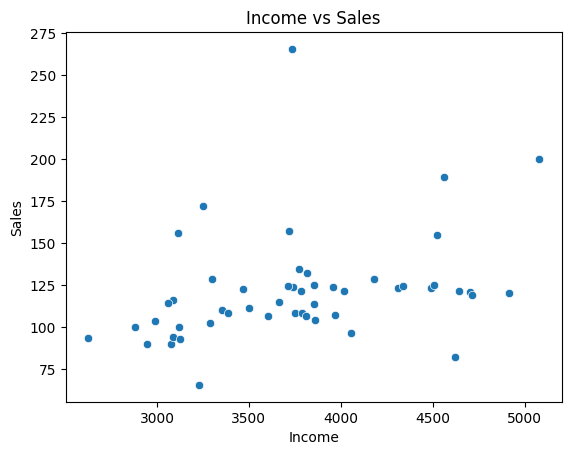

In [3]:
# Visualize the data (Income과 Sales의 관계)
sns.scatterplot(data=data, x='Income', y='Sales')
plt.title('Income vs Sales')
plt.xlabel('Income')
plt.ylabel('Sales')
plt.show()

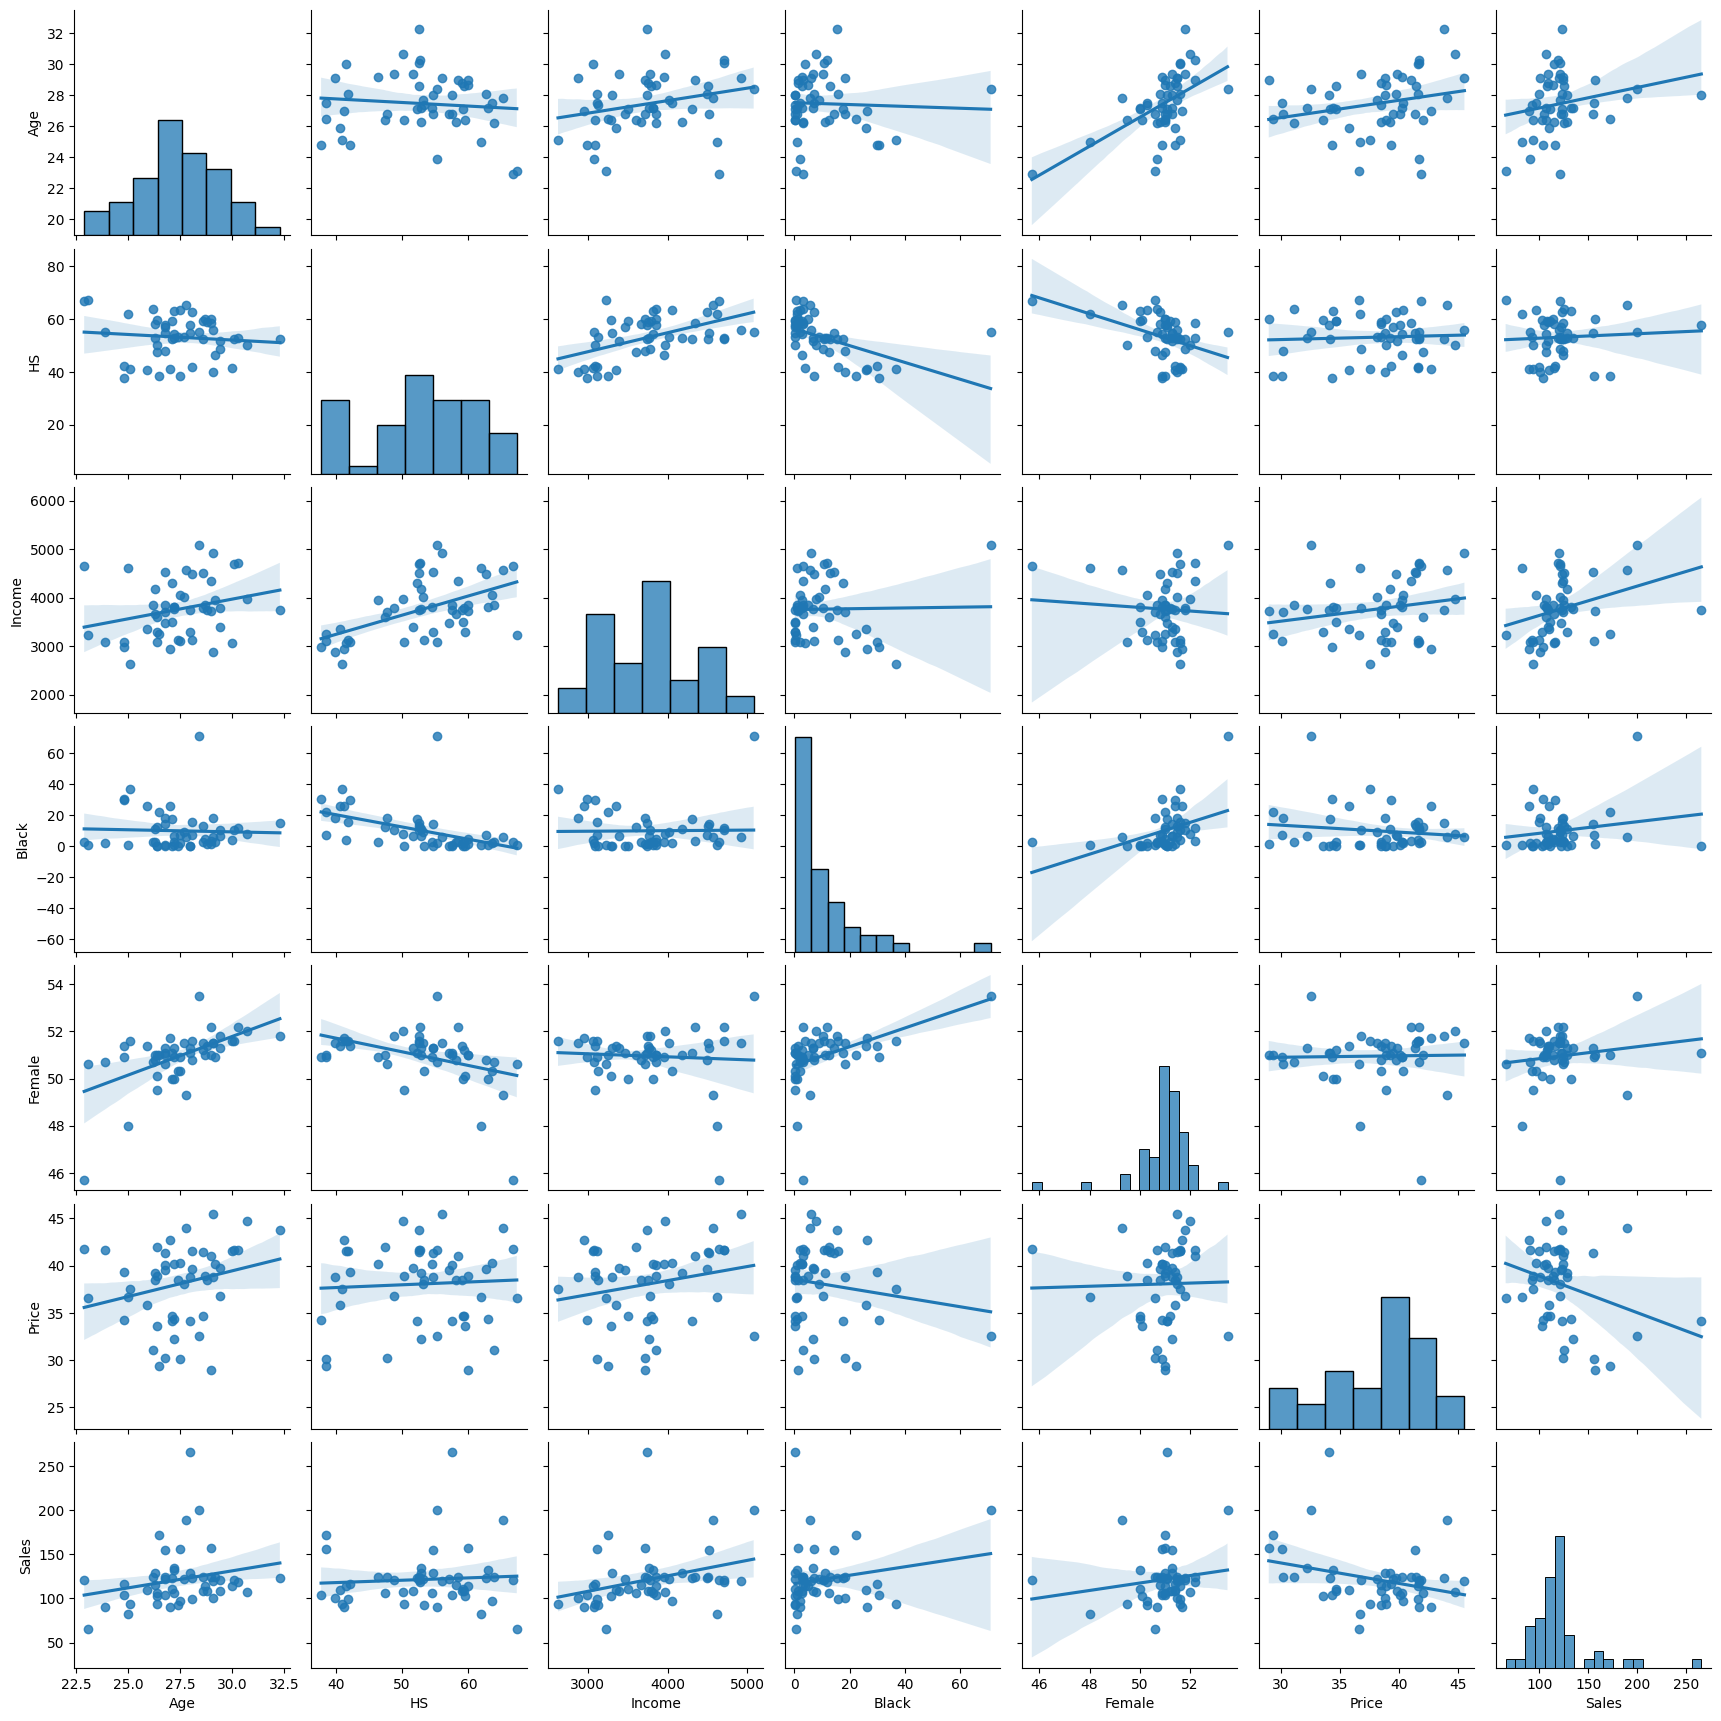

In [4]:
# Visualize all pairwise relationships. (diagonal과 off-diagonal)
sns.pairplot(data, kind="reg")

# Simple Linear Regression with statsmodels

In [5]:
import statsmodels.api as sm

# Set up the OLS model
X = sm.add_constant(data['Income']) # y절편을 위해 상수항 추가 y=ax
y = data['Sales']
model = sm.OLS(y, X).fit() # Least Square Estimator

# Print the summary of the regression model
print(model.summary())

# 해석 문제 => coefficient, std err, t 통계량, 등등

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     5.829
Date:                Mon, 30 Oct 2023   Prob (F-statistic):             0.0195
Time:                        15:27:39   Log-Likelihood:                -245.86
No. Observations:                  51   AIC:                             495.7
Df Residuals:                      49   BIC:                             499.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3625     27.743      1.996      0.0

## Model Diagnostics

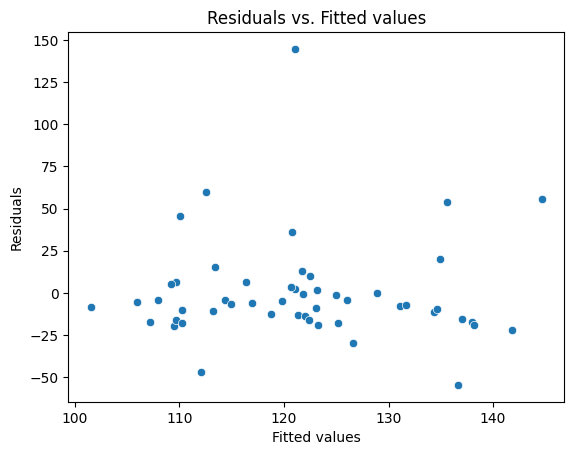

In [6]:
# Residuals vs. Fitted values plot
sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.title('Residuals vs. Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

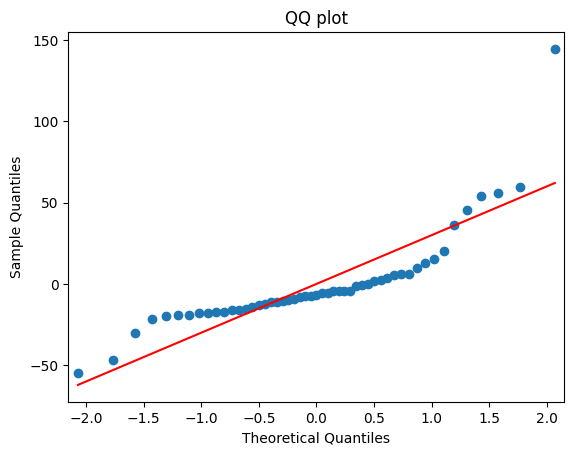

In [7]:
# QQ plot to check for normality of residuals
sm.qqplot(model.resid, line='s')
plt.title('QQ plot')
plt.show()

# 빨간선으로부터 멀어질수록 정규성을 띄지 않는다는 것을 의미

# Multiple Linear Regression

In [8]:
# Investigate which variable to recruit
data.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.098916,0.256581,-0.040330,0.553032,0.247757,0.226555
HS,-0.098916,1.000000,0.534005,-0.501712,-0.417378,0.056975,0.066695
Income,0.256581,0.534005,1.000000,0.017288,-0.068827,0.214557,0.326068
Black,-0.040330,-0.501712,0.017288,1.000000,0.450900,-0.147776,0.189590
Female,0.553032,-0.417378,-0.068827,0.450900,1.000000,0.022474,0.146221
Price,0.247757,0.056975,0.214557,-0.147776,0.022474,1.000000,-0.300623
Sales,0.226555,0.066695,0.326068,0.189590,0.146221,-0.300623,1.000000


In [ ]:
# Recruit another variable Price
X_multi = sm.add_constant(data[['Income', 'Price']])
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     8.012
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           0.000994
Time:                        05:18:54   Log-Likelihood:                -241.38
No. Observations:                  51   AIC:                             488.8
Df Residuals:                      48   BIC:                             494.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.3384     41.239      3.718      0.0

# Model Assumptions and Advanced Diagnostics

*   **Check for linearity**: The relationship between predictors and response should be linear.
*   **Check for independence**: Observations should be independent of each other.
*   **Check for homoscedasticity**: The variance of residuals should remain constant.
*   **Check for normality**: The residuals should follow a normal distribution.


## Visualizing the residuals

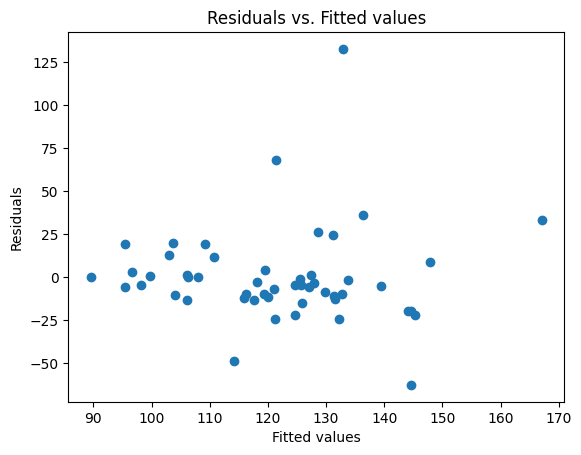

In [ ]:
plt.scatter(model_multi.fittedvalues, model_multi.resid)
plt.title('Residuals vs. Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

## Regression Diagnostics - Checking Normality of Residuals with Seaborn

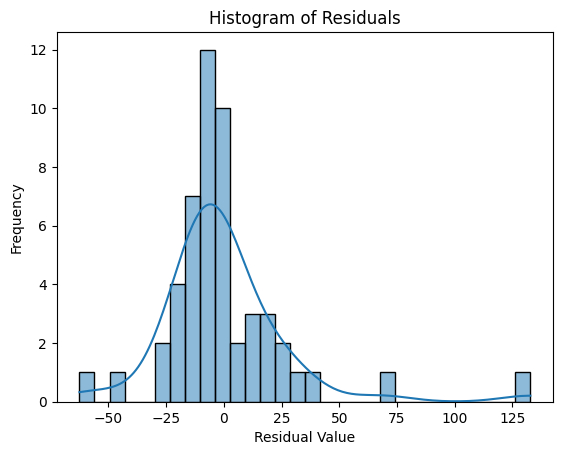

In [ ]:
sns.histplot(model_multi.resid, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

## Model Assumptions - Checking Linearity with Seaborn

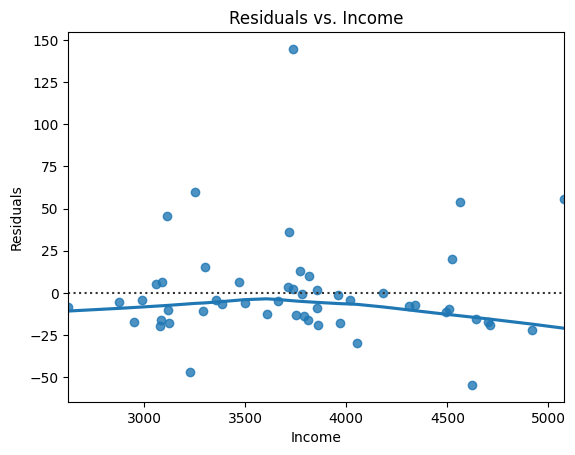

In [ ]:
sns.residplot(x=data['Income'], y=model.resid, data=data, lowess=True)
plt.title('Residuals vs. Income')
plt.xlabel('Income')
plt.ylabel('Residuals')
plt.show()

# 실선이 점선에 가깝세 되어야 residual이 정규성을 띈다고 할 수 있음

# Transformations - Log Transformation and Visualization with Seaborn

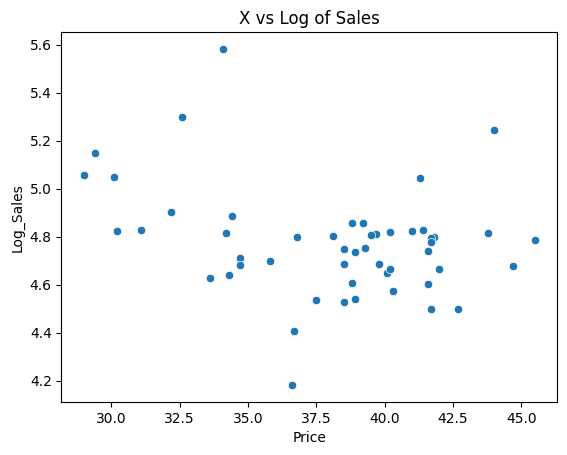

In [ ]:
data['Log_Sales'] = np.log(data['Sales'])
sns.scatterplot(data=data, x='Price', y='Log_Sales')
plt.title('X vs Log of Sales')
plt.show()

## Model with transformed value

In [ ]:
X_log = sm.add_constant(data['Income'])
y_log = data['Log_Sales']
model_log = sm.OLS(y_log, X_log).fit()
print(model_log.summary())

# 어떤 값이 이래야 좋은거고 안좋은거고 해석가능해야함.

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     7.832
Date:                Mon, 30 Oct 2023   Prob (F-statistic):            0.00732
Time:                        05:18:56   Log-Likelihood:                 7.1933
No. Observations:                  51   AIC:                            -10.39
Df Residuals:                      49   BIC:                            -6.523
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2356      0.194     21.810      0.0